# Exploring textbooks questions

## imports

In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [35]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [6]:
import pdfextraction.hierarchy_exctraction as hext
import pdfextraction.amt_boto_modules as amt

## Setting up paths and loading data

In [3]:
data_pickled_dir = './store_hit_results_metadata/question_anno/group_latest_combined/' 

In [4]:
base_path = 'ai2-vision-turk-data/textbook-annotation-test/labeled-questions/'
test_path = 'ai2-vision-turk-data/textbook-annotation-test/hierarchy-ext-test/'

In [5]:
combined_results_df = pd.read_pickle(data_pickled_dir + 'complete_df.pkl')
combined_consensus_df = pd.read_pickle(data_pickled_dir + 'consensus_df.pkl')
combined_consensus_with_workerid_df = pd.read_pickle(data_pickled_dir + 'consensus_df_w_workers.pkl') 

1) question type hist

2) what cats turkers do well on 

3) total questions 

In [13]:
book_breakdowns, page_ranges = amt.load_book_info()

In [19]:
bad_pages = pd.unique(combined_consensus_df.query('category == "No Consensus" or group_n == "No Consensus"')['page'])

consensus_only_df = combined_consensus_df[~combined_consensus_df['page'].isin(bad_pages)]
verified_pages_minus_bad = pd.unique(consensus_only_df['page']).tolist()
pd.unique(consensus_only_df['page']).shape

(468,)

In [21]:
accuracy_total, errors_total, box_totals, ind_page_results = hext.predict_and_verify_groups(verified_pages_minus_bad, base_path)

## Question category breakdown

In [28]:
q_only_df = consensus_only_df[consensus_only_df['group_n'] != '0']

In [34]:
consensus_only_df['category'].value_counts()

unlabeled            4882
Fill-in-the-Blank    2118
Multiple Choice      1035
Question             1023
Short Answer          898
Discussion            555
True/False            553
Definition            515
Header/Topic          428
Figure Label          414
Unlabeled             170
Name: category, dtype: int64

In [44]:
q_counts = q_only_df['category'].value_counts()

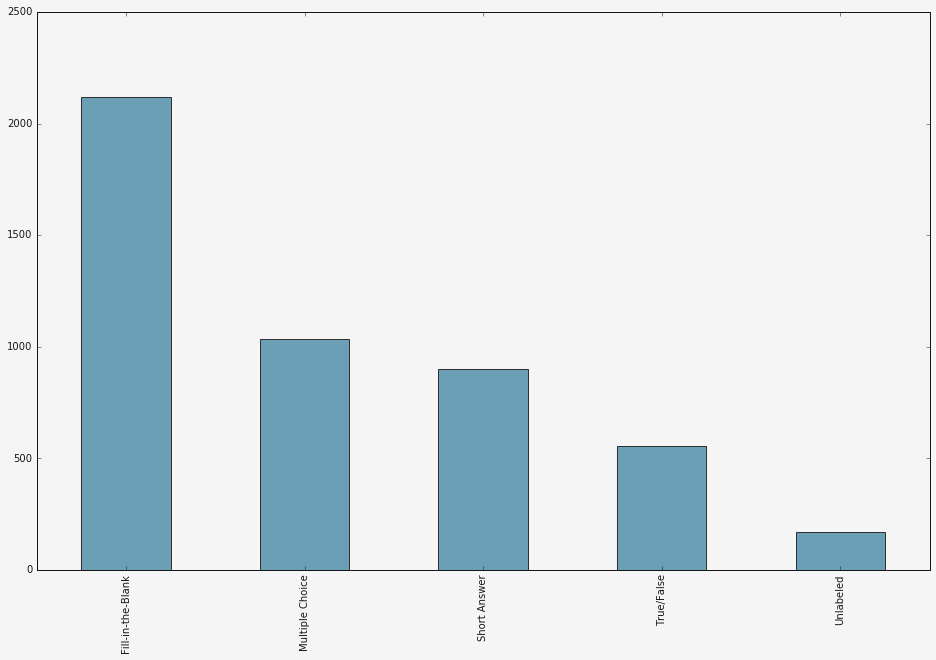

In [53]:
_ = q_counts.plot.bar()

In [67]:
gbqg = q_only_df.groupby(['page', 'group_n'])['category']

In [82]:
q_only_df

,page,box_id,category,hit_id,group_n
20,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q11,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
21,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q13,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
22,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q14,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
23,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q15,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
24,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q16,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
44,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q10,Fill-in-the-Blank,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,1
46,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q13,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
47,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q14,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
48,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q15,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
49,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q16,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2


In [97]:
qtypes = gbqg.apply(pd.unique)

In [110]:
question_groups_by_cat = qtypes.value_counts()[:5]

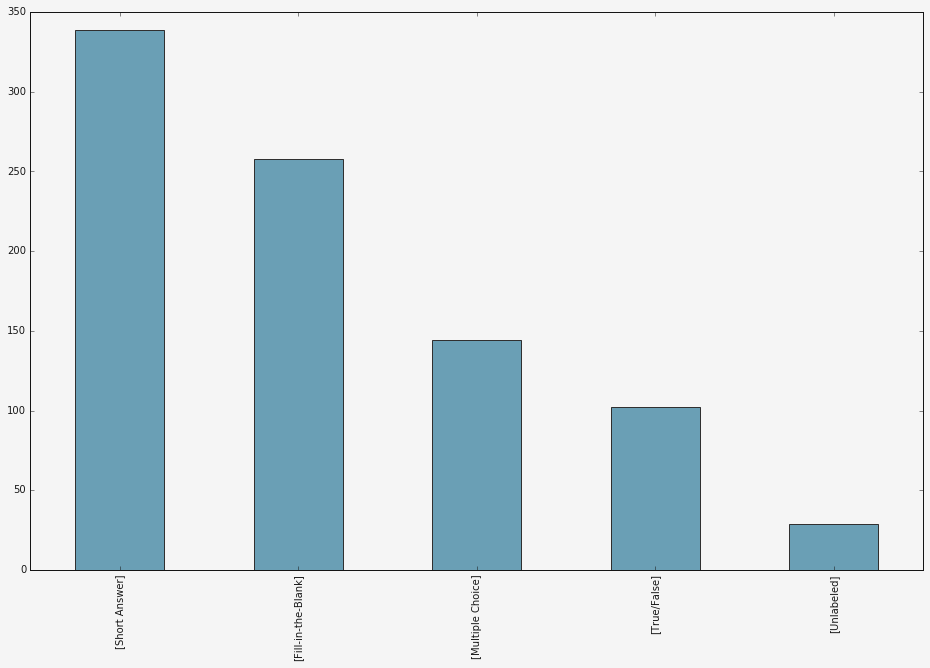

In [111]:
_ = question_groups_by_cat.plot.bar()

# End